In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy import stats
from scipy.stats import norm
from scipy.stats import uniform
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats import anova as sms_anova


from sklearn.preprocessing import MinMaxScaler
## MinMaxScaler.fit_transform is for Normalizing the data

from sklearn.preprocessing import StandardScaler
## StandardScaler.fit_transform to standarize data

from statsmodels.graphics import tsaplots ## For making plots of the auto-correlation function
from statsmodels.tsa.ar_model import AutoReg ##For estimating AR models
from statsmodels.graphics.tsaplots import plot_pacf ## For making plots of the partial auto-correlation function

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from datetime import datetime, timedelta
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Function to plot the series
def plot_series(series):
    plt.figure(figsize=(20,10))
    plt.plot(series, color='navy')
    plt.axhline(series.mean(), linestyle='--', color='k', alpha=0.3)
    plt.ylabel("Demand", fontsize=16)

    for year in range(2016, 2021):
        for month in range(1, 13):
            plt.axvline(datetime(year,month,1), linestyle='--', color='k', alpha=0.5)

In [3]:
# Importing the demand data for Ontario Region 
demand_df = pd.read_excel("../Research Method/merged_demand_1620.xlsx")
demand_df

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2016-01-01,1,13417,479,1318,783,965,4789,867,57,2603,377,1212,13451,33
1,2016-01-01,2,12968,473,1281,715,975,4597,829,59,2491,377,1183,12979,11
2,2016-01-01,3,12395,464,1158,693,945,4441,796,65,2392,365,1135,12454,59
3,2016-01-01,4,12228,447,1170,681,923,4332,776,48,2349,352,1118,12195,-33
4,2016-01-01,5,12116,432,1182,676,926,4272,774,63,2307,349,1108,12089,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43843,2020-12-31,20,16783,598,1287,1151,1112,5948,1249,158,3128,498,1770,16900,116
43844,2020-12-31,21,16154,597,1296,1102,1062,5741,1182,153,3028,475,1735,16371,217
43845,2020-12-31,22,15744,581,1290,1055,1011,5527,1124,153,2908,467,1684,15801,58
43846,2020-12-31,23,15092,571,1289,1002,962,5301,1070,156,2773,443,1600,15167,75


In [4]:
# Adding the "HOUR" column to the "Date" column and changing it to datetime format
demand_df["Date"] +=  pd.to_timedelta(demand_df.Hour, unit='h')
demand_df.head(30)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2016-01-01 01:00:00,1,13417,479,1318,783,965,4789,867,57,2603,377,1212,13451,33
1,2016-01-01 02:00:00,2,12968,473,1281,715,975,4597,829,59,2491,377,1183,12979,11
2,2016-01-01 03:00:00,3,12395,464,1158,693,945,4441,796,65,2392,365,1135,12454,59
3,2016-01-01 04:00:00,4,12228,447,1170,681,923,4332,776,48,2349,352,1118,12195,-33
4,2016-01-01 05:00:00,5,12116,432,1182,676,926,4272,774,63,2307,349,1108,12089,-28
5,2016-01-01 06:00:00,6,12257,448,1186,698,941,4294,786,57,2339,361,1114,12222,-35
6,2016-01-01 07:00:00,7,12528,462,1190,747,955,4373,811,52,2405,366,1145,12506,-22
7,2016-01-01 08:00:00,8,12820,507,1143,761,987,4475,837,66,2463,386,1176,12801,-18
8,2016-01-01 09:00:00,9,12986,515,1155,755,1042,4548,873,70,2496,402,1187,13042,57
9,2016-01-01 10:00:00,10,13569,529,1219,807,1061,4754,924,65,2582,419,1203,13562,-6


In [5]:
# Setting the date as the index column
demand_df.set_index("Date", inplace = True)

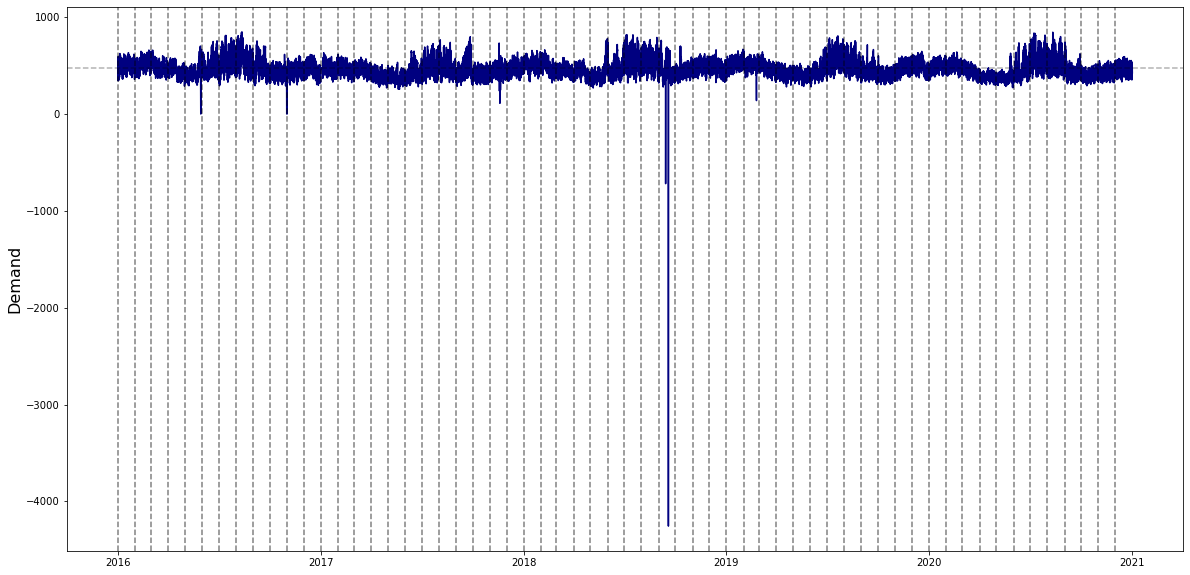

In [6]:
# Plotting the deries
plot_series(demand_df["Niagara"])

In [7]:
# Key statistics of the Niagara and Toronto region 
demand_df.loc[:, ["Toronto", "Niagara"]].describe()

,Toronto,Niagara
count,43848.000000,43848.000000
mean,5709.157453,472.270525
std,1026.431346,95.900662
min,0.000000,-4255.000000
25%,4934.000000,408.000000
50%,5707.000000,463.000000
75%,6343.000000,525.000000
max,9769.000000,847.000000


In [8]:
#Looking for missing values
demand_df.isnull().sum().sum()

0

## It is observed that there some negative values which could be bad data since the demand for electricity cannot be negative. We replace the negative values with the demand in the previous hour

In [9]:
# Replacing all negative values with zeros
demand_df["Niagara"][demand_df["Niagara"] < 0] = 0
# Replacing all zeros with the value in the previous row
demand_df["Niagara"].replace(to_replace=0, method='ffill', inplace = True)

## Plotting the series again to confirm that the erroneous entries have been fixed

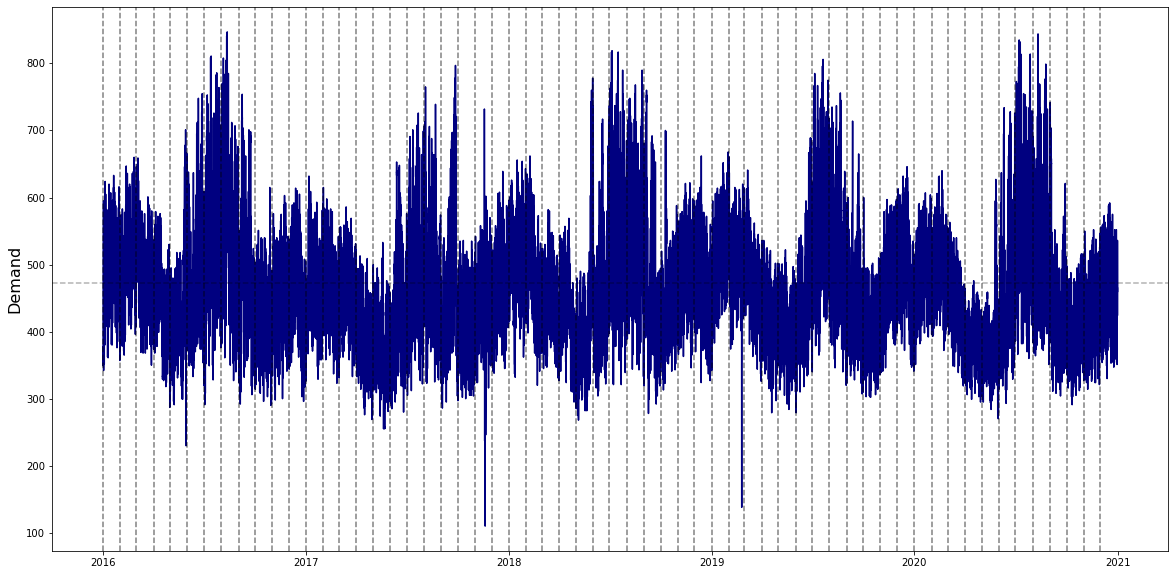

In [10]:
# Plotting the series
plot_series(demand_df["Niagara"])

In [11]:
# Resampling the data from hourly to weekly using the mean
weekly_demand_df = demand_df.resample("W").mean().round(2)
weekly_demand_df

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
Date,,,,,,,,,,,,,,
2016-01-03,12.34,14726.76,496.54,1322.28,881.21,1093.35,5222.96,979.55,68.63,2844.17,433.83,1366.63,14709.18,-17.61
2016-01-10,12.50,16624.64,517.18,1367.18,993.01,1190.87,6039.77,1055.76,75.32,3290.04,489.87,1580.66,16599.66,-25.00
2016-01-17,12.50,17141.18,582.51,1427.20,1031.46,1239.89,6200.93,1111.35,95.66,3377.35,499.07,1574.57,17139.93,-1.17
2016-01-24,12.50,17347.23,550.18,1410.60,1080.23,1229.25,6261.16,1147.45,99.38,3412.12,525.38,1629.85,17345.54,-1.70
2016-01-31,12.50,16300.70,508.26,1394.64,1013.82,1109.87,5969.30,1017.74,82.68,3221.72,482.98,1500.35,16301.29,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,12.50,15633.42,565.76,1227.70,1020.70,982.40,5640.32,1051.01,83.36,3053.43,464.42,1665.74,15754.93,121.53
2020-12-13,12.50,15900.15,581.35,1263.80,1049.41,1000.91,5687.89,1057.27,133.59,3076.08,463.57,1710.11,16024.06,123.89
2020-12-20,12.50,16755.65,607.86,1331.36,1142.47,1098.99,5920.78,1160.43,155.25,3214.30,486.97,1762.89,16881.39,125.72


In [12]:
#Checking for NaN's after resampling data
weekly_demand_df.isnull().sum().sum()

0

In [13]:
# Creating a target variable
y_hol_weekly = weekly_demand_df["Niagara"]
y_metro_weekly = weekly_demand_df["Toronto"]

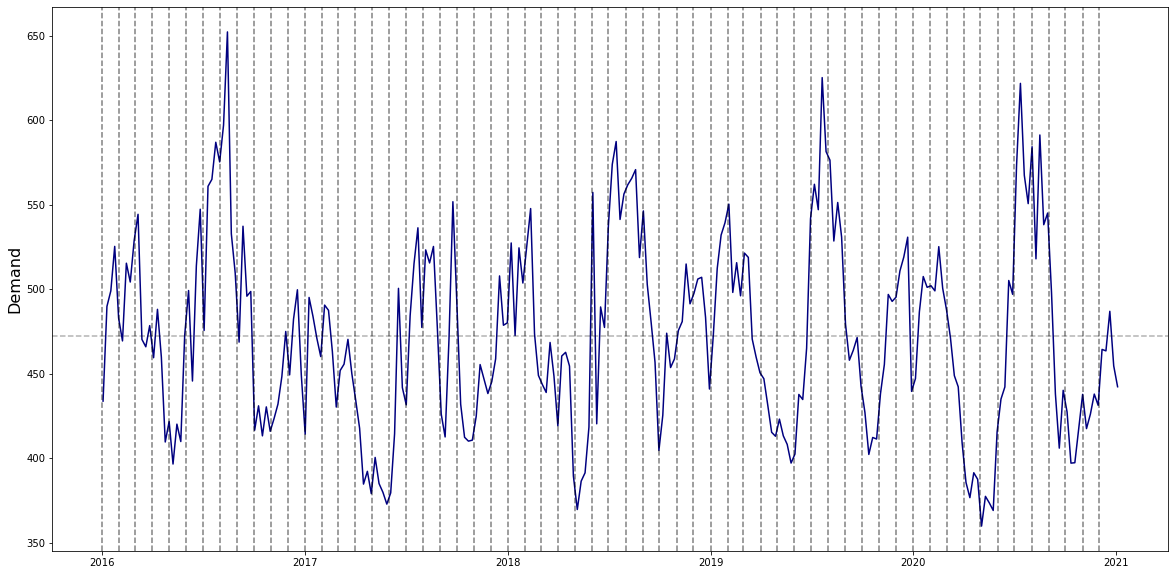

In [14]:
plot_series(y_hol_weekly)

## USING AUGMENTED DICKEY FULLER TEST TO CHECK FOR STATIONARITY

In [15]:
## ADF tests for Niagara 
adf_hol_weekly = adfuller(y_hol_weekly, autolag='AIC')
print(f'ADF Statistic hol_weekly: {adf_hol_weekly[0]}')
print(f'p-value hol_weekly: {adf_hol_weekly[1]}')

## ADF tests for Toronto
adf_metro_weekly = adfuller(y_metro_weekly, autolag='AIC')
print(f'ADF Statistic metro_weekly: {adf_metro_weekly[0]}')
print(f'p-value metro_weekly: {adf_metro_weekly[1]}')

ADF Statistic hol_weekly: -7.265097009710906
p-value hol_weekly: 1.6428870178093408e-10
ADF Statistic metro_weekly: -6.532404196700459
p-value metro_weekly: 9.795510899455548e-09


## The non-seasonal data is stationary

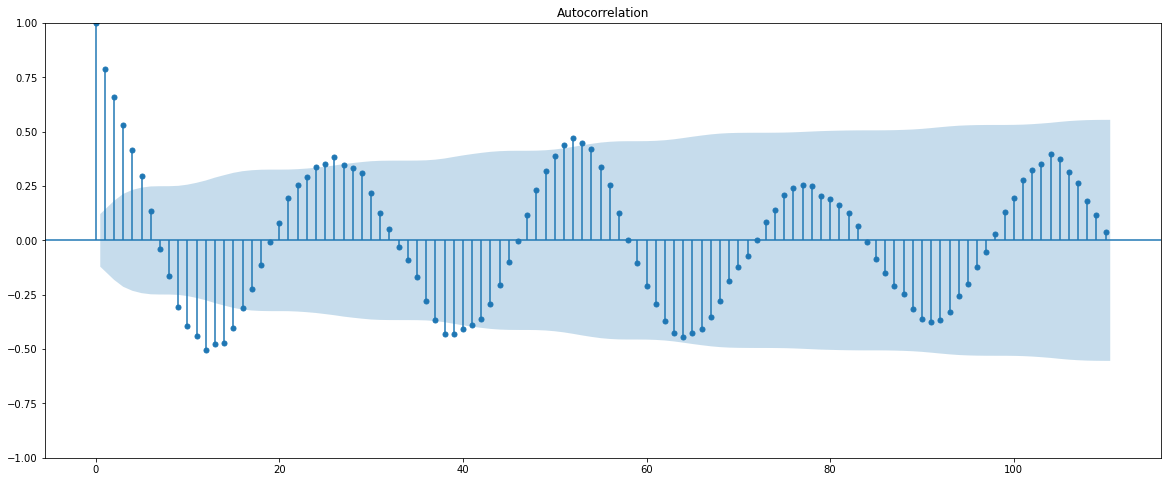

In [16]:
# ACF plot for Niagara demand
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(y_hol_weekly, lags = 110, ax=ax);

## We clearly see a cyclical trend every 12 weeks (approx). Hence, we will use a Seasonal ARIMA model

/Users/naziheffendi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


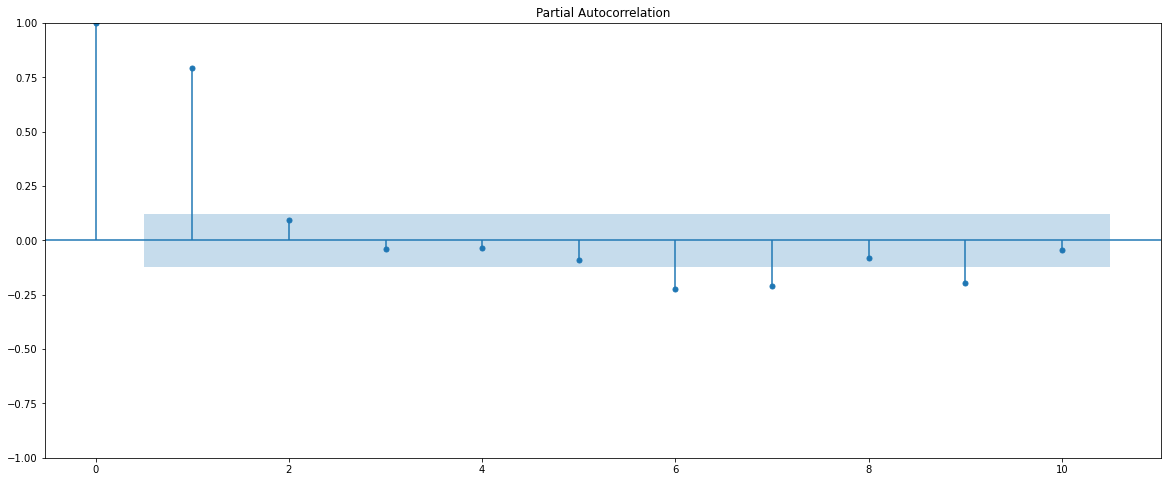

In [17]:
# Creating a PACF plot for the Niagara data
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(y_hol_weekly, lags = 10
                          , ax=ax);

## The ACF decreases geometrically of the non-seasonal data so q= 0
## The PACF shows 1 significant lag and then has the next 4 lags as insignificant so we will choose p=1
## Since the non-seasonal data is stationary d=0
## p = 1, d = 0, q = 0

# Finding "P", "D", "Q" and "m" also known as the Seasonal part of the SARIMA model 

In [57]:
# Since we saw 12 week trend in seasonality, Performing seasonal differencing of 12 weeks
weekly_demand_df["Niagara_diff"] = weekly_demand_df["Niagara"].diff(12)
weekly_demand_df

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Niagara_diff
Date,,,,,,,,,,,,,,,
2016-01-03,12.34,14726.76,496.54,1322.28,881.21,1093.35,5222.96,979.55,68.63,2844.17,433.83,1366.63,14709.18,-17.61,NaN
2016-01-10,12.50,16624.64,517.18,1367.18,993.01,1190.87,6039.77,1055.76,75.32,3290.04,489.87,1580.66,16599.66,-25.00,NaN
2016-01-17,12.50,17141.18,582.51,1427.20,1031.46,1239.89,6200.93,1111.35,95.66,3377.35,499.07,1574.57,17139.93,-1.17,NaN
2016-01-24,12.50,17347.23,550.18,1410.60,1080.23,1229.25,6261.16,1147.45,99.38,3412.12,525.38,1629.85,17345.54,-1.70,NaN
2016-01-31,12.50,16300.70,508.26,1394.64,1013.82,1109.87,5969.30,1017.74,82.68,3221.72,482.98,1500.35,16301.29,0.60,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,12.50,15633.42,565.76,1227.70,1020.70,982.40,5640.32,1051.01,83.36,3053.43,464.42,1665.74,15754.93,121.53,26.31
2020-12-13,12.50,15900.15,581.35,1263.80,1049.41,1000.91,5687.89,1057.27,133.59,3076.08,463.57,1710.11,16024.06,123.89,57.55
2020-12-20,12.50,16755.65,607.86,1331.36,1142.47,1098.99,5920.78,1160.43,155.25,3214.30,486.97,1762.89,16881.39,125.72,46.74


In [58]:
# Dropping the NaN's and saving the differenced column into a variable
y_hol_weekly_seasonal_diff = weekly_demand_df["Niagara_diff"].dropna()
y_hol_weekly_seasonal_diff

Date
2016-03-27    44.68
2016-04-03   -30.36
2016-04-10   -10.93
2016-04-17   -65.55
2016-04-24   -73.32
              ...  
2020-12-06    26.31
2020-12-13    57.55
2020-12-20    46.74
2020-12-27    27.26
2021-01-03    45.19
Freq: W-SUN, Name: Niagara_diff, Length: 250, dtype: float64

In [59]:
## ADF tests for Niagara 
adf_hol_weekly_s = adfuller(y_hol_weekly_seasonal_diff, autolag='AIC')
print(f'ADF Statistic hol_weekly: {adf_hol_weekly_s[0]}')
print(f'p-value hol_weekly: {adf_hol_weekly_s[1]}')

ADF Statistic hol_weekly: -5.76109720384447
p-value hol_weekly: 5.669953890486052e-07


## The seasonal difference data is stationary

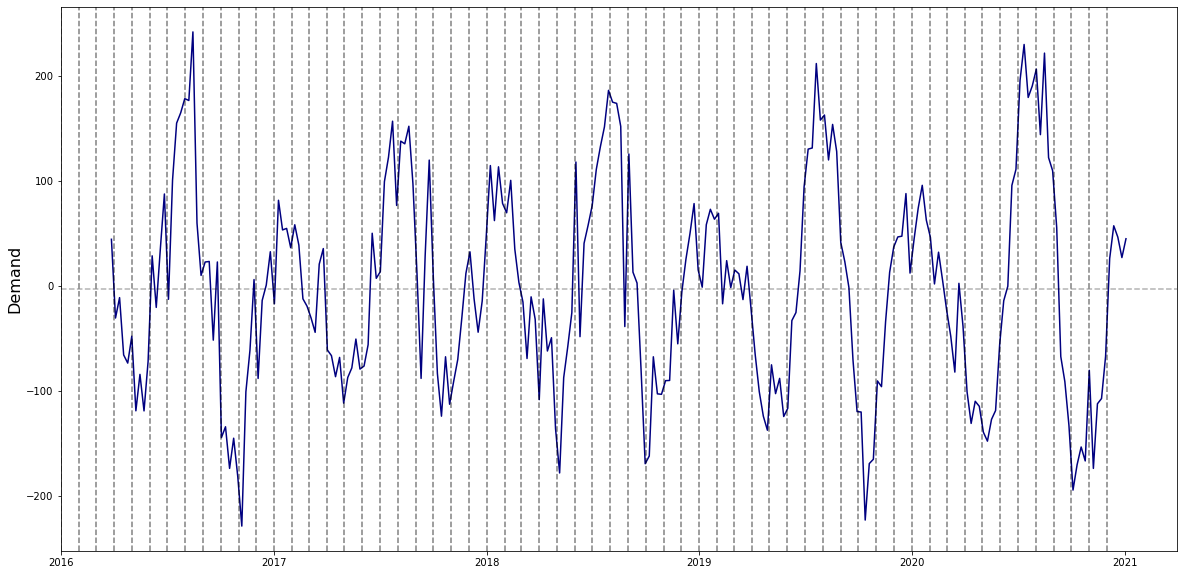

In [60]:
# PLotting the series
plot_series(y_hol_weekly_seasonal_diff)

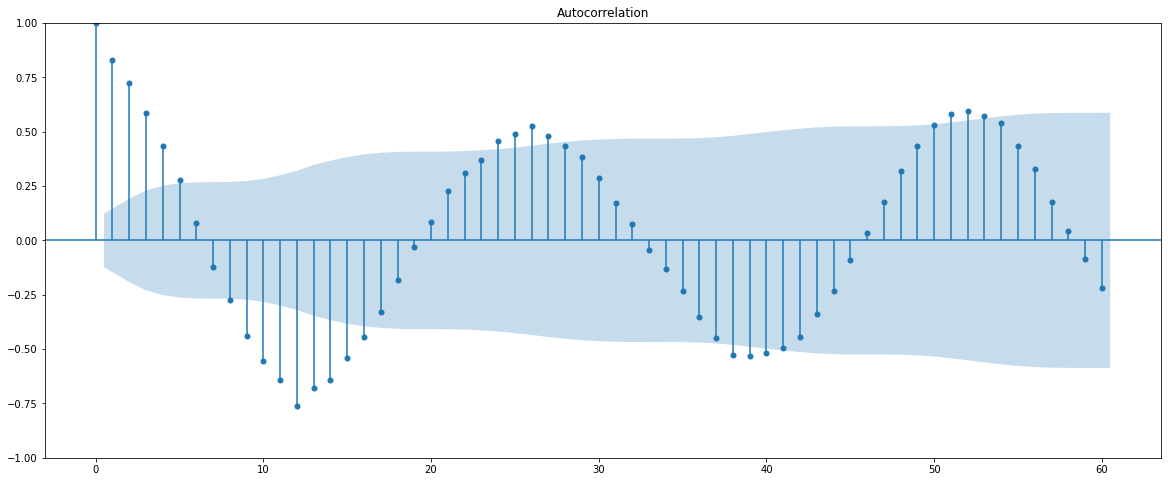

In [61]:
# ACF of the differenced series
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(y_hol_weekly_seasonal_diff, lags = 60, ax=ax);

/Users/naziheffendi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


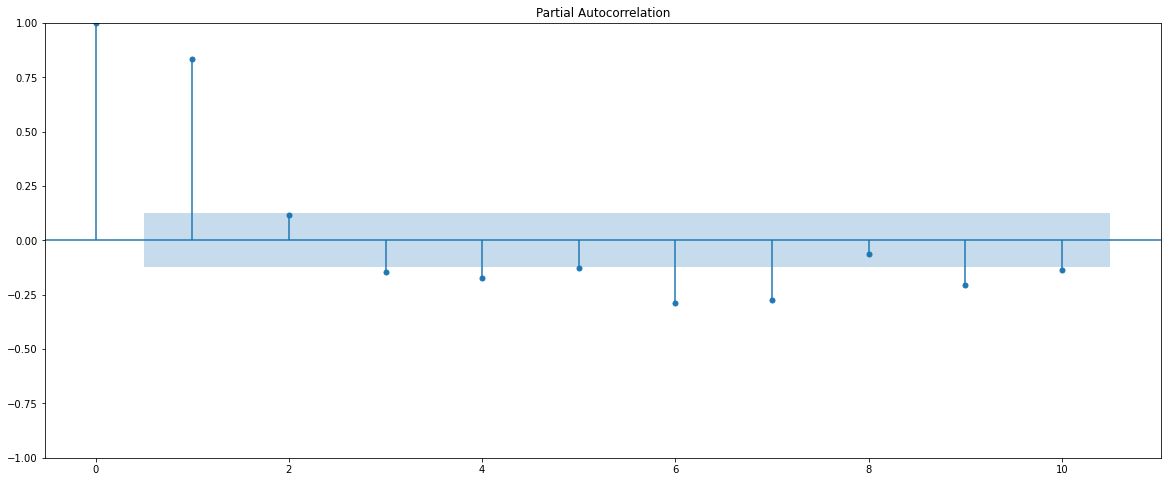

In [62]:
# PACF of the differenced series
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(y_hol_weekly_seasonal_diff, lags = 10
                          , ax=ax);

## The ACF changes geometrically of the seasonal data as well so Q= 0
## The PACF shows 1 significant lag and then has the next lag as insignificant so we will choose P = 1
## Since the seasonal data is differenced by the 12 week seasonality D = 0 and m = 12
## P = 1, D = 0, Q = 0, m = 12

In [63]:
# Splitting the data into train and test data 
train_end = datetime(2019, 12, 29)
test_end = datetime(2021, 1, 3)

train_data = y_hol_weekly[:train_end]
test_data = y_hol_weekly[train_end + timedelta(weeks =1):test_end]

In [64]:
# Initiating the model with the above parameters we dervied from the ACF and PACF plots
arma_order = (1,0,0)
seasonal_order = (1, 0, 0, 12)
# define model
model = SARIMAX(train_data, order=arma_order, seasonal_order=seasonal_order, trend ="c")

In [65]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
#fit the model
model_fit = model.fit()

#summary of the model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Niagara   No. Observations:                  209
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1032.082
Date:                            Thu, 16 Jun 2022   AIC                           2072.164
Time:                                    00:37:39   BIC                           2085.534
Sample:                                01-03-2016   HQIC                          2077.569
                                     - 12-29-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    168.3033     30.838      5.458      0.000     107.862     228.745
ar.L1          0.7224      0.047     15.345      0.000       0.630       0.815
ar.S.L12      -0.2790      0.074     -3.784      0.000      -0.423      -0.134
sigma2      1130.3029    103.621     10.908      0.000     927.209    1333.396
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 7.86
Prob(Q):                              0.57   Prob(JB):                         0.02
Heteroskedasticity (H):               0.59   Skew:                             0.32
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## We see that both the variables are significant

In [66]:
# Predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

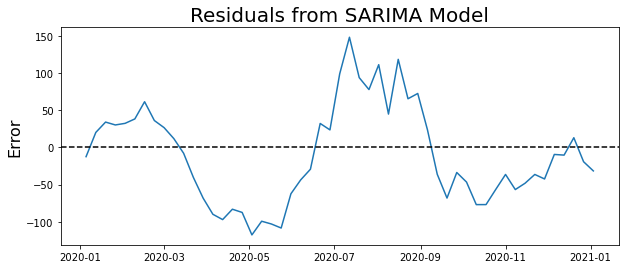

In [67]:
# Plotting the residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

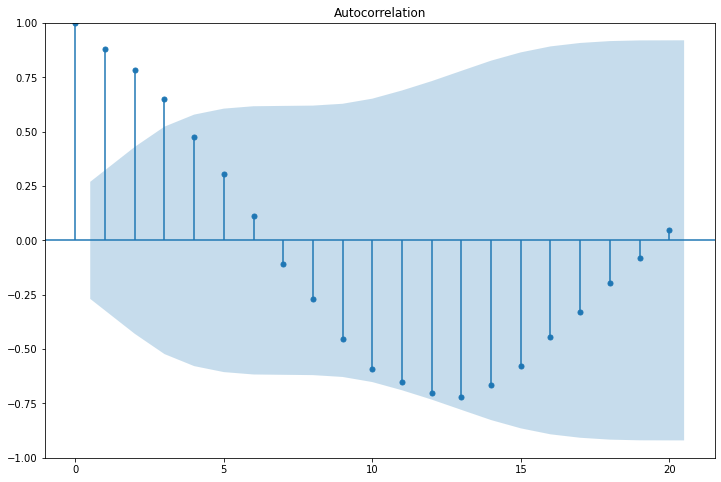

In [68]:
# ACF of the residuals of the first model
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.tsa.plot_acf(residuals, lags = 20, ax=ax);

## We see that the residuals seem to oscilate around zero and there seems to be some significant auto-correlation in the residuals. We can try and improve the model using a rolling cross-validation procedure

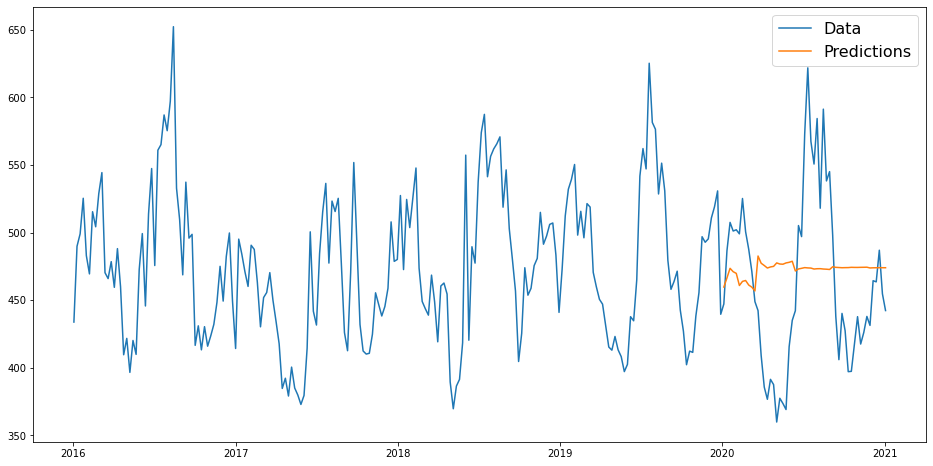

In [69]:
# Plotting the predictions against the real data
plt.figure(figsize=(16,8))

plt.plot(y_hol_weekly)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

## Here we see that the predictions are not very good. We will try and improve the model with a rolling cross-validation approach

In [70]:
# Calculating the RMSE
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 65.0972119562046


In [71]:
# Calculating the MAPE
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.1235


# USING ROLLING CROSS-VALIDATION TO IMPROVE MODEL AND PREDICTIONS

In [72]:
# Creating a for loop to make a one step ahead prediction and then add the true value into the training data and create a rolling cross-validation
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = y_hol_weekly[:train_end-timedelta(weeks=1)]
    model2 = SARIMAX(train_data, order=arma_order, seasonal_order=seasonal_order, trend = "c")
    model_fit2 = model2.fit()

    pred = model_fit2.forecast()
    rolling_predictions[train_end] = pred

In [73]:
#summary of the model
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Niagara   No. Observations:                  261
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1284.212
Date:                            Thu, 16 Jun 2022   AIC                           2576.423
Time:                                    00:38:18   BIC                           2590.681
Sample:                                01-03-2016   HQIC                          2582.154
                                     - 12-27-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    151.1638     26.613      5.680      0.000      99.003     203.325
ar.L1          0.7481      0.041     18.311      0.000       0.668       0.828
ar.S.L12      -0.2710      0.066     -4.128      0.000      -0.400      -0.142
sigma2      1092.5136     89.223     12.245      0.000     917.640    1267.387
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                12.16
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.39
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## With the rolling CV model we see that the AIC and BIC compared to the first model have NOT improved but we will check if the predictions have improved

In [74]:
# Residuals of the SARIMA model with Rolling CV
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

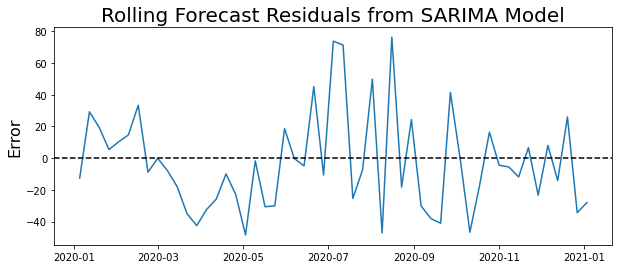

In [75]:
#Plotting the residuals of this second model
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

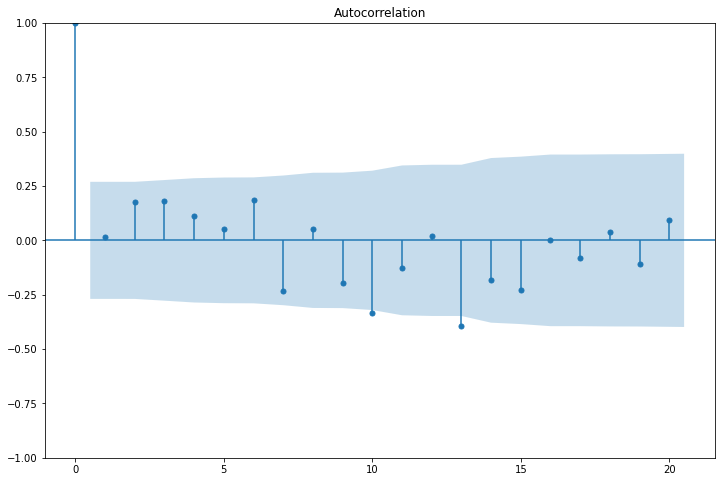

In [76]:
# ACF of the residuals of the second model
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.tsa.plot_acf(rolling_residuals, lags = 20, ax=ax);

## In the above plots we again see that the residuals seem to oscillate around zero with lower variance and that there is no SIGNIFICANT auto-correlation amongst the residuals. This model seems to be better than the previous one. We will now double check by plotting the predictions against the actual data

Root Mean Squared Error: 30.813117835656637
Mean Absolute Percent Error: 0.0529


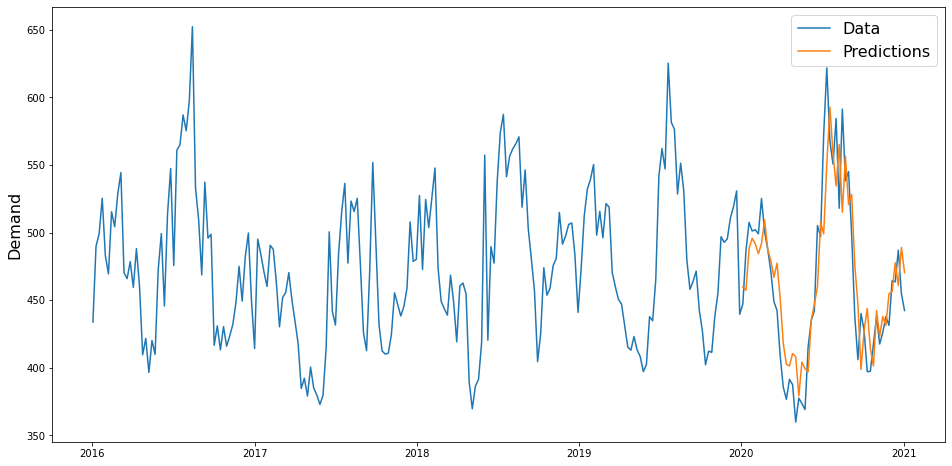

In [77]:
# Plotting the predictions against the real data, calculating the new RMSE and MAPE
plt.figure(figsize=(16,8))

plt.plot(y_hol_weekly)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.ylabel('Demand', fontsize=16)

print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

## We see that this model is much better at forecasting and closely mimics the graph of the actual values.
## We observe that the RMSE has reduced by more than half from 65.09 to 30.81 and the MAPE has reduced from 12.35% to 5.29%. This is a very good improvement.

# APPENDIX

In [96]:
auto_arima(y_hol_weekly, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2599.982, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2855.953, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2585.968, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2677.264, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3976.014, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2602.155, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2589.790, Time=1.48 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2586.827, Time=0.47 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2588.405, Time=0.24 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2589.462, Time=1.50 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2780.554, Time=0.22 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2586.913, Time=0.44 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=2588.291, Time=0.26 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2664.523, Time=0.29 sec
 ARIMA(2,0,1)(1,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  262
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1288.984
Date:                            Thu, 16 Jun 2022   AIC                           2585.968
Time:                                    00:39:38   BIC                           2600.241
Sample:                                         0   HQIC                          2591.704
                                            - 262                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.2992     26.426      5.650      0.000      97.505     201.093
ar.L1          0.7502      0.041     18.406      0.000       0.670       0.830
ar.S.L12      -0.2666      0.066     -4.068      0.000      -0.395      -0.138
sigma2      1091.4539     88.999     12.264      0.000     917.020    1265.888
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                12.55
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.40
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## The auto_arima model has also confirmed that the Best model is :  ARIMA(1,0,0)(1,0,0)[12] with intercept which is congruent with our analysis

# THE END